# ランダムなマップ生成方法
## 機能概要
- 指定したマップにおけるタイルの配置をベースとする
- 指定個数・指定サイズの静的なduckieをマップ上に配置する
- 作成したマップは保存するかしないかを選択できる
- duckieは道路上のランダムな位置に出現する


In [1]:
import sys
sys.path.append("../")
from utils.env import launch_env
from utils.wrappers import NormalizeWrapper, ImgWrapper, DtRewardWrapper, ActionWrapper, ResizeWrapper
import matplotlib.pyplot as plt

DEBUG:commons:version: 6.2.4 *
DEBUG:typing:version: 6.2.3
DEBUG:duckietown_world:duckietown-world version 6.2.38 path /Users/shibu/.local/share/virtualenvs/WorldModelG15-cwtMp0YT/lib/python3.7/site-packages
/Users/shibu/.local/share/virtualenvs/WorldModelG15-cwtMp0YT/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shibu/.local/share/virtualenvs/WorldModelG15-cwtMp0YT/lib/python3.7/site-packages/contracts/library/array_ops.py:225: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for mo

{'audio': ('xaudio2', 'directsound', 'openal', 'pulse', 'silent'), 'debug_font': False, 'debug_gl': True, 'debug_gl_trace': False, 'debug_gl_trace_args': False, 'debug_graphics_batch': False, 'debug_lib': False, 'debug_media': False, 'debug_texture': False, 'debug_trace': False, 'debug_trace_args': False, 'debug_trace_depth': 1, 'debug_trace_flush': True, 'debug_win32': False, 'debug_x11': False, 'graphics_vbo': True, 'shadow_window': True, 'vsync': None, 'xsync': True, 'xlib_fullscreen_override_redirect': False, 'darwin_cocoa': True, 'search_local_libs': True}


In [2]:
env = launch_env()
print("Initialized environment")

# Wrappers
env = ResizeWrapper(env)
env = NormalizeWrapper(env)
env = ImgWrapper(env)  # to make the images from 160x120x3 into 3x160x120
env = ActionWrapper(env)
env = DtRewardWrapper(env)
print("Initialized Wrappers")

INFO:gym-duckietown:Information about the graphics card:
 pyglet_version: 1.5.11
    information: dict[4]
                 │ vendor: Intel Inc.
                 │ renderer: Intel(R) Iris(TM) Plus Graphics OpenGL Engine
                 │ version: 2.1 INTEL-18.4.6
                 │ shading-language-version: 1.20
  nvidia_around: False
DEBUG:gym-duckietown:Falling back to non-multisampled frame buffer
DEBUG:gym-duckietown:Falling back to non-multisampled frame buffer
INFO:duckietown_world: data: /Users/shibu/.local/share/virtualenvs/WorldModelG15-cwtMp0YT/lib/python3.7/site-packages/duckietown_world/data
DEBUG:gym-duckietown:loading map file "/Users/shibu/.local/share/virtualenvs/WorldModelG15-cwtMp0YT/lib/python3.7/site-packages/duckietown_world/data/gd1/maps/loop_empty.yaml"
INFO:gym-duckietown:done
DEBUG:gym-duckietown:loading mesh 'duckiebot' from file_path '/Users/shibu/.local/share/virtualenvs/WorldModelG15-cwtMp0YT/lib/python3.7/site-packages/duckietown_world/data/gd1/meshes/duck

Initialized environment
Initialized Wrappers


In [7]:
args = {
    "base_map_dir_abs_path": "/Users/shibu/Workspace/WorldModelG15/env/base_maps",
    "base_map_name": "base_1",
    "created_map_dir_abs_path": "/Users/shibu/Workspace/WorldModelG15/env/created_maps",
    "created_map_name": "created_1",
    "min_duck_num" : 1,
    "max_duck_num" : 10,
    "min_duck_height" : 0.05,
    "max_duck_height" : 0.10,
    "delete_created_map" : False,
}
# 上記の引数の場合
# 静的なdukieが1~10個の範囲で生成される
# duckieの大きさは0.05~0.10の範囲となる（デフォルトが0.06程度っぽい？）
env.create_and_load_random_static_duckie_map(**args)

DEBUG:gym-duckietown:loading map file "/Users/shibu/Workspace/WorldModelG15/env/base_maps/base_1.yaml"
INFO:gym-duckietown:done
INFO:gym-duckietown:done
DEBUG:gym-duckietown:loading map file "/Users/shibu/Workspace/WorldModelG15/env/created_maps/created_1.yaml"
INFO:gym-duckietown:done


DEBUG:gym-duckietown:[1.18969747 0.         1.1917132 ] corresponds to tile at (2, 2) which is not drivable: {'coords': (2, 2), 'kind': 'grass', 'angle': 1, 'drivable': False, 'texture': <gym_duckietown.graphics.Texture object at 0x135101e50>, 'color': array([1, 1, 1, 1])}
DEBUG:gym-duckietown:Invalid pose. Collision free: True On drivable area: False
DEBUG:gym-duckietown:safety_factor: 1.3
DEBUG:gym-duckietown:pos: [1.09674983 0.         1.22115783]
DEBUG:gym-duckietown:l_pos: [1.00380219 0.         1.25060246]
DEBUG:gym-duckietown:r_pos: [1.18969747 0.         1.1917132 ]
DEBUG:gym-duckietown:f_pos: [1.06141628 0.         1.10962066]
DEBUG:gym-duckietown:[1.19028002 0.         1.50008679] corresponds to tile at (2, 2) which is not drivable: {'coords': (2, 2), 'kind': 'grass', 'angle': 1, 'drivable': False, 'texture': <gym_duckietown.graphics.Texture object at 0x135101e50>, 'color': array([1, 1, 1, 1])}
DEBUG:gym-duckietown:Invalid pose. Collision free: True On drivable area: False
DE

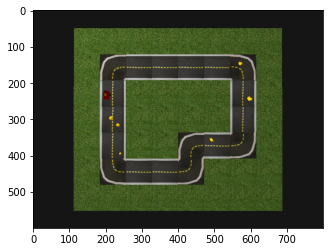

In [8]:
env.reset()
topdown_img, front_img = env.render_topdown_and_front_img()
plt.imshow(topdown_img)